In [174]:
## Lending club case study
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')

In [147]:
## Import the previous loan data
loan_data =pd.read_csv("C:\\Users\\vbelsare\\Downloads\\ML course\\3. Lending Club Case Study\\loan\\loan.csv", sep=',', dtype='unicode')

In [148]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [149]:
loan_data.shape

(39717, 111)

In [150]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [151]:
loan_data = loan_data.dropna(how = 'all')
loan_data.shape

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [152]:
## Drop all rows having loan status as current
loan_data = loan_data[loan_data.loan_status!='Current'].reset_index(drop=True)
loan_data.shape

(38577, 111)

In [153]:
## Drop all columns having 100% missing data - All values NAN
tmp=loan_data.isnull().sum()==loan_data.shape[0]
NaN_Cols_df = tmp.to_frame()
NaN_Cols_df = NaN_Cols_df[NaN_Cols_df[0]==True]
col_list = NaN_Cols_df.index.tolist() # listall columns in list
loan_data_wo_na = loan_data.drop(columns=col_list) # drop all columns from lis
loan_data_wo_na.shape

(38577, 56)

In [154]:
## Drop all columns having 70% or more data missing
threshold = 70
tmp=(loan_data.isnull().sum()/loan_data.shape[0] * 100) > threshold
NaN_Cols_df = tmp.to_frame()
NaN_Cols_df = NaN_Cols_df[NaN_Cols_df[0]==True]
col_list = NaN_Cols_df.index.tolist() # listall columns in list
loan_data_wo_na = loan_data.drop(columns=col_list) # drop all columns from lis
loan_data_wo_na.shape

(38577, 55)

In [127]:
cols = loan_data_wo_na.columns
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [128]:
## Keeping useful columns
relevant_cols = ["issue_d","loan_amnt", "term", "int_rate", "grade", "sub_grade", "annual_inc", "purpose", "dti", "emp_length", "home_ownership", "verification_status", "installment", "addr_state", "loan_status"]
final_loan_data = loan_data_wo_na[relevant_cols].copy()
final_loan_data.head()

,issue_d,loan_amnt,term,int_rate,grade,sub_grade,annual_inc,purpose,dti,emp_length,home_ownership,verification_status,installment,addr_state,loan_status
0,Dec-11,5000,36 months,10.65%,B,B2,24000,credit_card,27.65,10+ years,RENT,Verified,162.87,AZ,Fully Paid
1,Dec-11,2500,60 months,15.27%,C,C4,30000,car,1,< 1 year,RENT,Source Verified,59.83,GA,Charged Off
2,Dec-11,2400,36 months,15.96%,C,C5,12252,small_business,8.72,10+ years,RENT,Not Verified,84.33,IL,Fully Paid
3,Dec-11,10000,36 months,13.49%,C,C1,49200,other,20,10+ years,RENT,Source Verified,339.31,CA,Fully Paid
4,Dec-11,5000,36 months,7.90%,A,A4,36000,wedding,11.2,3 years,RENT,Source Verified,156.46,AZ,Fully Paid


In [129]:
### Data Cleaning - missing values fill 
final_loan_data.isna().sum()

issue_d                   0
loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
annual_inc                0
purpose                   0
dti                       0
emp_length             1033
home_ownership            0
verification_status       0
installment               0
addr_state                0
loan_status               0
dtype: int64

In [130]:
##Assumption - We take employment length as a categorical variable. We calculate the mode of it 
##and replace all the missing values with it. 


emp_len_mode = final_loan_data.emp_length.mode()
emp_len_mode[0]

'10+ years'

In [131]:
final_loan_data['emp_length'].fillna(final_loan_data['emp_length'].mode()[0],inplace=True)
final_loan_data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [162]:
## Data formatting 
## Remove percentage from interest rate and convert to float

final_loan_data['int_rate'] = final_loan_data['int_rate'].str.replace('%', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [171]:
final_loan_data['loan_amnt'] = final_loan_data['loan_amnt'].astype(int)
final_loan_data['annual_inc'] = final_loan_data['annual_inc'].astype(float)
final_loan_data['installment'] = final_loan_data['installment'].astype(float)
final_loan_data['dti'] = final_loan_data['dti'].astype(float)
final_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_d              38577 non-null  object 
 1   loan_amnt            38577 non-null  int32  
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   purpose              38577 non-null  object 
 8   dti                  38577 non-null  float64
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  verification_status  38577 non-null  object 
 12  installment          38577 non-null  float64
 13  addr_state           38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  issue_d_month        38577 non-null 

In [144]:
## issue date format into month and year
final_loan_data["issue_d_month"] = final_loan_data["issue_d"].apply(lambda x: x.split("-")[0])
final_loan_data["issue_d_year"] = final_loan_data["issue_d"].apply(lambda x: "20"+x.split("-")[1])

In [172]:
### Distribution of data
final_loan_data.describe()

,loan_amnt,int_rate,annual_inc,dti,installment
count,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,11047.025430,11.932219,6.877797e+04,13.272727,322.466318
std,7348.441646,3.691327,6.421868e+04,6.673044,208.639215
min,500.000000,5.420000,4.000000e+03,0.000000,15.690000
25%,5300.000000,8.940000,4.000000e+04,8.130000,165.740000
50%,9600.000000,11.710000,5.886800e+04,13.370000,277.860000
75%,15000.000000,14.380000,8.200000e+04,18.560000,425.550000
max,35000.000000,24.400000,6.000000e+06,29.990000,1305.190000


<AxesSubplot:ylabel='loan_status'>

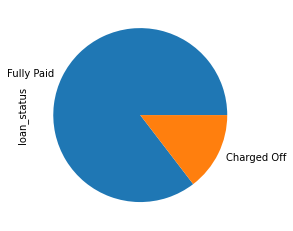

In [159]:
(final_loan_data['loan_status'].value_counts(1)*100).plot(kind='pie')

<AxesSubplot:ylabel='purpose'>

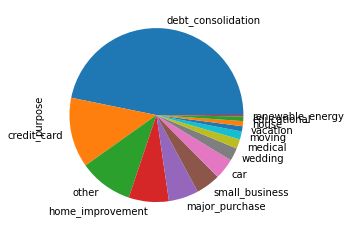

In [156]:
(final_loan_data['purpose'].value_counts(1)*100).plot(kind='pie')

<AxesSubplot:ylabel='grade'>

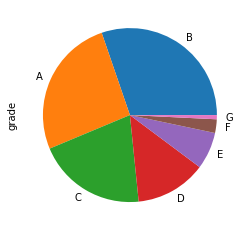

In [157]:
(final_loan_data['grade'].value_counts(1)*100).plot(kind='pie')

<AxesSubplot:ylabel='home_ownership'>

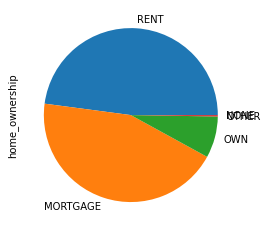

In [158]:
(final_loan_data['home_ownership'].value_counts(1)*100).plot(kind='pie')

In [178]:
final_loan_data.head()

,issue_d,loan_amnt,term,int_rate,grade,sub_grade,annual_inc,purpose,dti,emp_length,home_ownership,verification_status,installment,addr_state,loan_status,issue_d_month,issue_d_year
0,Dec-11,5000,36 months,10.65,B,B2,24000.0,credit_card,27.65,10+ years,RENT,Verified,162.87,AZ,Fully Paid,Dec,2011
1,Dec-11,2500,60 months,15.27,C,C4,30000.0,car,1.00,< 1 year,RENT,Source Verified,59.83,GA,Charged Off,Dec,2011
2,Dec-11,2400,36 months,15.96,C,C5,12252.0,small_business,8.72,10+ years,RENT,Not Verified,84.33,IL,Fully Paid,Dec,2011
3,Dec-11,10000,36 months,13.49,C,C1,49200.0,other,20.00,10+ years,RENT,Source Verified,339.31,CA,Fully Paid,Dec,2011
4,Dec-11,5000,36 months,7.90,A,A4,36000.0,wedding,11.20,3 years,RENT,Source Verified,156.46,AZ,Fully Paid,Dec,2011


------------- issue_d_month --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


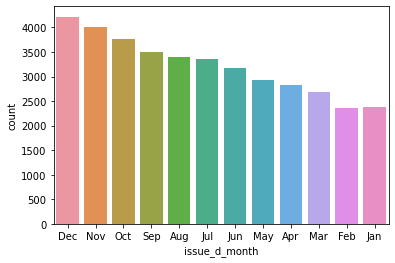

------------- issue_d_year --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


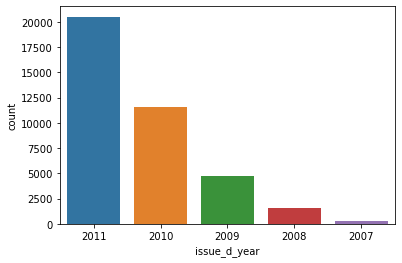

------------- term --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


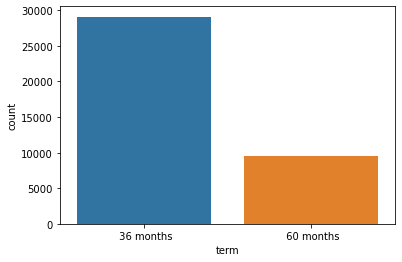

------------- grade --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


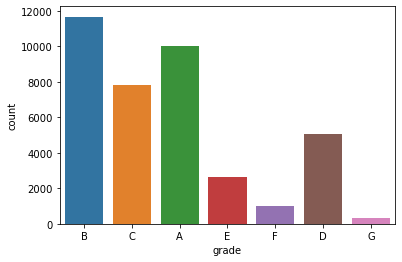

------------- sub_grade --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


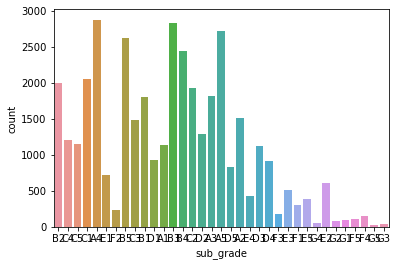

------------- purpose --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


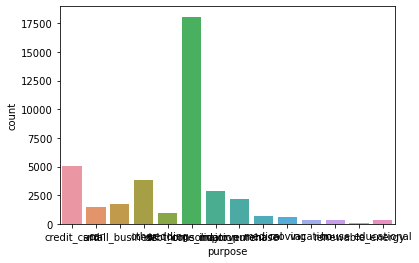

------------- emp_length --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


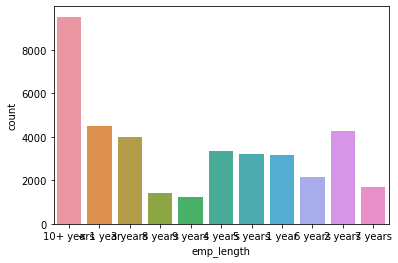

------------- home_ownership --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


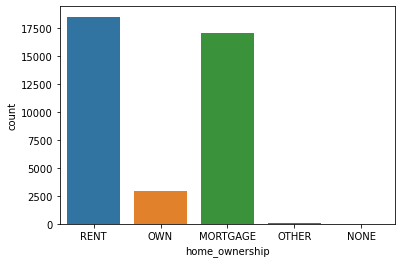

------------- verification_status --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


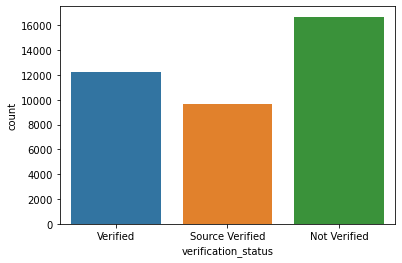

------------- addr_state --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


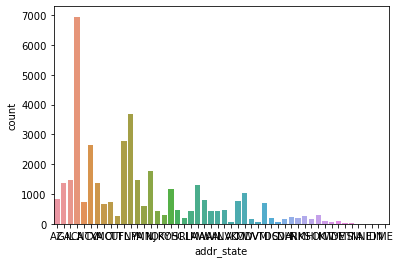

------------- loan_status --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


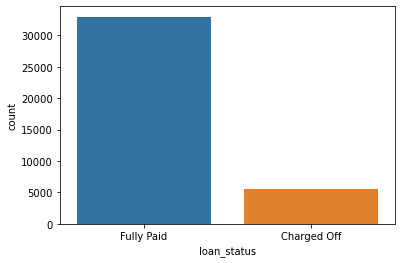

In [179]:
### Univariate Analysis:
categorical_cols = ["issue_d_month", "issue_d_year", "term", "grade", "sub_grade", "purpose", "emp_length", "home_ownership", "verification_status", "addr_state", "loan_status"]
continuous_cols = ["loan_amnt","int_rate","annual_inc","dti", "installment"]

for i in categorical_cols:
    print("-------------", i, "--------------")
    sns.countplot(final_loan_data[i])
    plt.show()

------------- loan_amnt --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


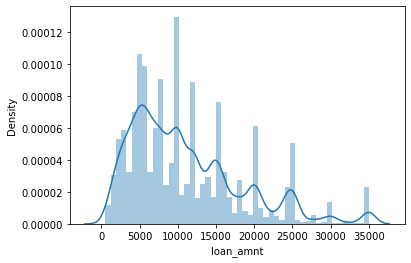

------------- int_rate --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


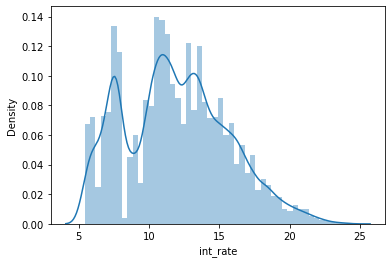

------------- annual_inc --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


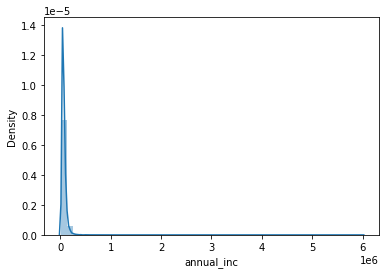

------------- dti --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


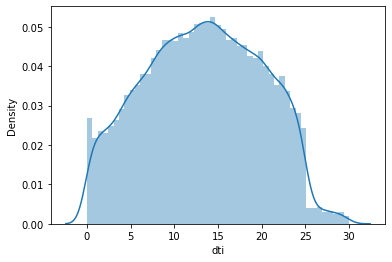

------------- installment --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


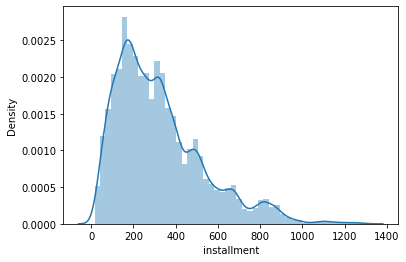

In [180]:
for i in continuous_cols:
    print("-------------", i, "--------------")
    sns.distplot(final_loan_data[i])
    plt.show()

------------- loan_amnt --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


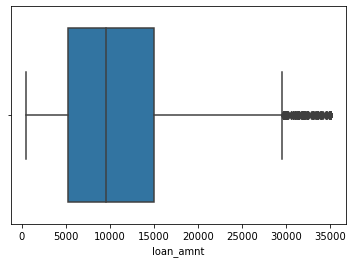

------------- int_rate --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


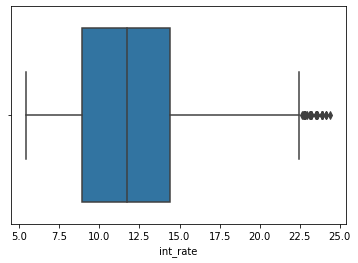

------------- annual_inc --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


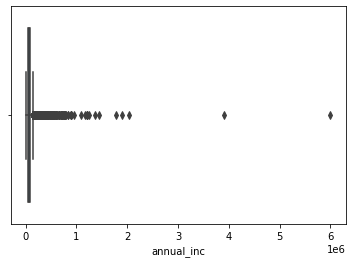

C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- dti --------------


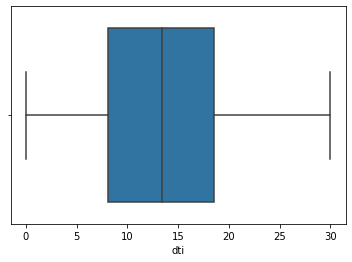

------------- installment --------------


C:\Users\vbelsare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


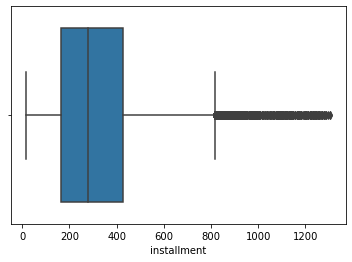

In [184]:
for i in continuous_cols:
    print("-------------", i, "--------------")
    sns.boxplot(final_loan_data[i])
    plt.show()

------------- issue_d_month --------------


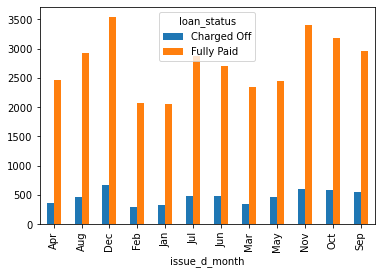

------------- issue_d_year --------------


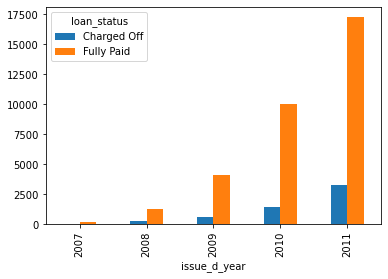

------------- term --------------


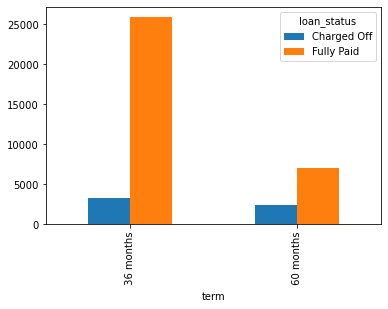

------------- grade --------------


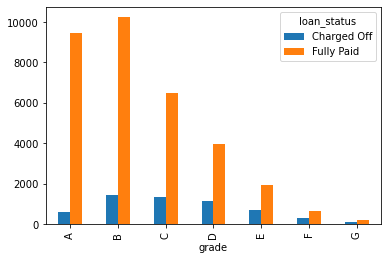

------------- sub_grade --------------


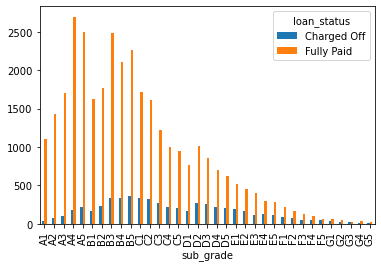

------------- purpose --------------


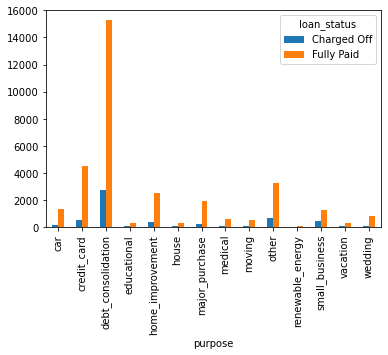

------------- emp_length --------------


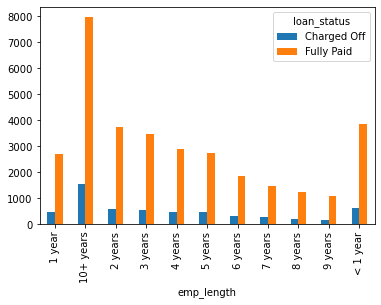

------------- home_ownership --------------


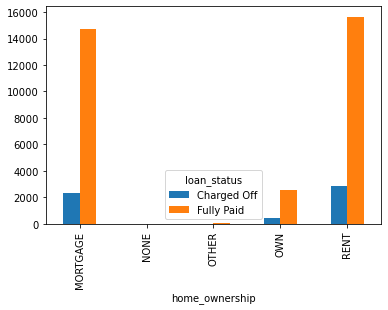

------------- verification_status --------------


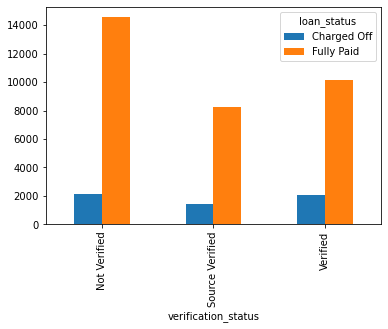

------------- addr_state --------------


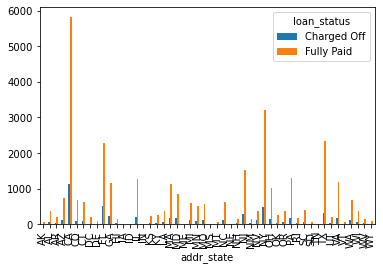

------------- loan_status --------------


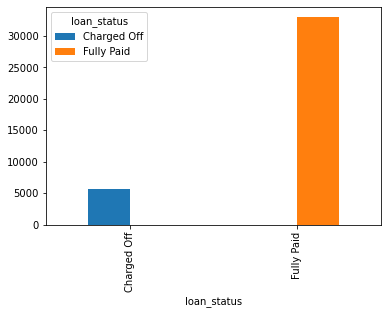

In [189]:
for i in categorical_cols:
    print("-------------", i, "--------------")
    final_loan_data.groupby(i)['loan_status'].value_counts().unstack().plot(kind='bar',stacked=False)
    plt.show()

------------- loan_amnt --------------


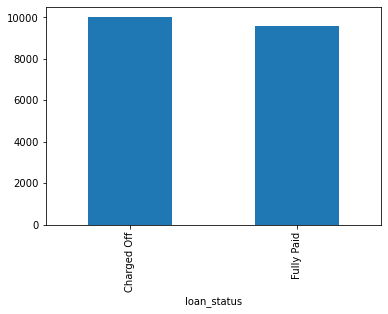

------------- int_rate --------------


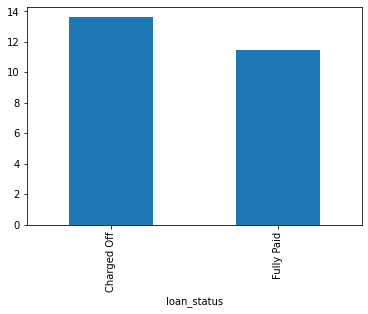

------------- annual_inc --------------


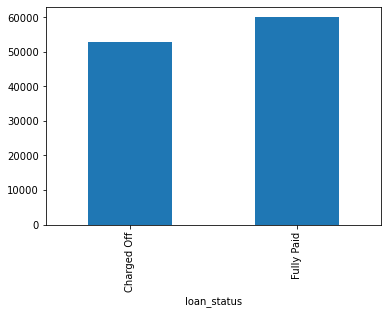

------------- dti --------------


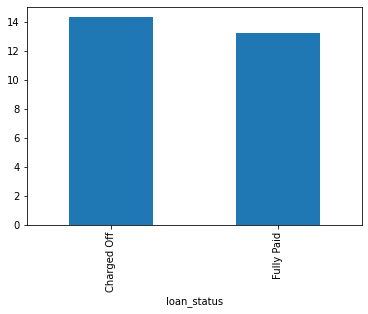

------------- installment --------------


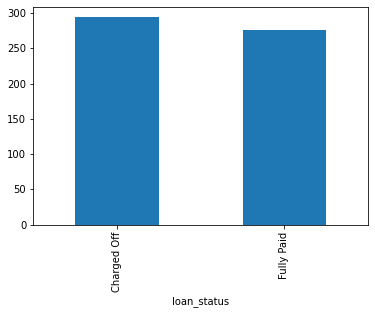

In [194]:
for i in continuous_cols:
    print("-------------", i, "--------------")
    final_loan_data.groupby('loan_status')[i].median().plot(kind='bar',stacked=False)
    plt.show()

In [ ]:
## Bivariate Analysis